# TensorFlow Tutorial Using Fashion MNIST

![clothes dataset images](https://github.com/mmphego/TensorFlow-Course/raw/master/img/clothes.png)

*Figure 1 [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) samples (by Zalando, MIT License).*

## Introduction
Machine learning (ML)/Deep Learning(DL)/Neural Network (NN) tools have recently made a huge splash with applications in data analysis, image classification, and data generation. Although ML methods have existed for decades, recent advancements in hardware have generated systems powerful enough to run these algorithms.

The typical "hello world" example for ML is a classifier trained over the MNIST(Modified National Institute of Standards and Technology database) dataset; a dataset of the handwritten digits 0-9. This dataset is getting a little stale and is no longer impressive due to both its seeming simplicity and to the plethora of existing tutorials on the topic. Here we will use a newer dataset to perform our ML "hello world", the Fashion MNIST dataset!


The Zeroth Step of ML (that should be completed before ever putting a hand to mouse, or finger to key) is understanding the format and sizes of your data. This step is often referred to as feature engineering. Feature engineering, typically, includes selecting and preprocessing the particular aspects of training data to give to your algorithm. You and I will start a good habit of examining the data and its format to make decisions concerning the appropriate size and format for our NN.

The Fashion MNIST dataset is comprised of 70,000 grayscale images of articles of clothing. The greyscale values for a pixel range from 0-255 (black to white). Each low-resolution image is 28x28 pixels and is of exactly one clothing item. Alongside each image is a label that places the article within a category; these categories are shown in Figure 2 with an example image belonging to the class.

![detail view of clothing categories](https://github.com/mmphego/TensorFlow-Course/raw/master/img/clothesDetails.png)

*Figure 2 class numbers are shown next to image labels*

## TL;DR

Open this tutorial on Google colab:  [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mmphego/TensorFlow-Course/blob/master/fashion_mnist.ipynb)

And, walk through the tutorial yourself.

## Code walk-through

To complete this tutorial we will to install a few packages; `pip` is a fast and easy way to install packages and their dependencies. For Machine Learning projects we use a library called [TensorFlow](https://www.tensorflow.org/), it handle all the complicated maths for you so you do not need to worry much on the maths side of things. For visualization we using `matplotlib` & `nnv` and for numerical-computations we using `numpy`.


In [1]:
!pip install nnv

In [2]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

## Import MNIST

Now we are ready to roll! First, we must admit that it takes a lot of data to train a NN, and 70,000 examples is an anemic dataset. So instead of doing a more traditional 70/20/10 or 80/10/10 percent split between training/validating/testing, we will do a simple 6:1 ratio of training:testing (note that this is not best practices, but when there is limited data it may be your only recourse).

We first load in the dataset from the Keras package:



In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


The first line merely assigns the name fashion_mnist to a particular dataset located within Keras' dataset library. The second line defines four arrays containing the training and testing data, cleaved again into separate structures for images and labels, and then loads all of that data into our standup of Python. The training data arrays will be used to --you guessed it-- train the model, and the testing arrays will allow us to evaluate the performance of our model.

## Look at data

It's always nice to be able to show that we've actually done something; ever since kindergarten there has been no better way than with a picture! You'll note that we pip installed and imported MatPlotLib, a library for plots and graphs. Here we'll use it to visualize an example of the Fashion MNIST dataset.

In [4]:
print(f"Train images dimensions: {train_images.shape}")
print(f"Test images dimensions: {test_images.shape}")

Train images dimensions: (60000, 28, 28)
Test images dimensions: (10000, 28, 28)


The first command basically generates a figure object that will be manipulated by commands 2 through 4. Command 2 specifies what it is that we shall be plotting: the first element from the train_images array. NOTE: Recall that python is an inclusive counting language, meaning that it numbers/indexes things starting from zero, not one! And the final command, "show()", tells Python to generate this figure in an external (from CMD) window.

Your window should contain a plot that looks similar to Figure 3. Also, be aware that after plt.show(), Python will not return you to a command line until the newly generated window (containing our super nice picture) is closed. Upon closing the window, you will be able to continue entering Python commands.

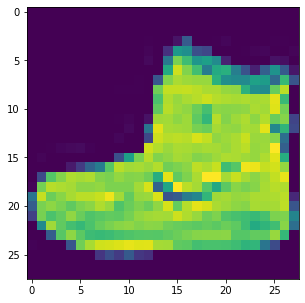

In [5]:
plt.figure(figsize=(10,5))
plt.imshow(train_images[0])
plt.colormaps()
plt.show()

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

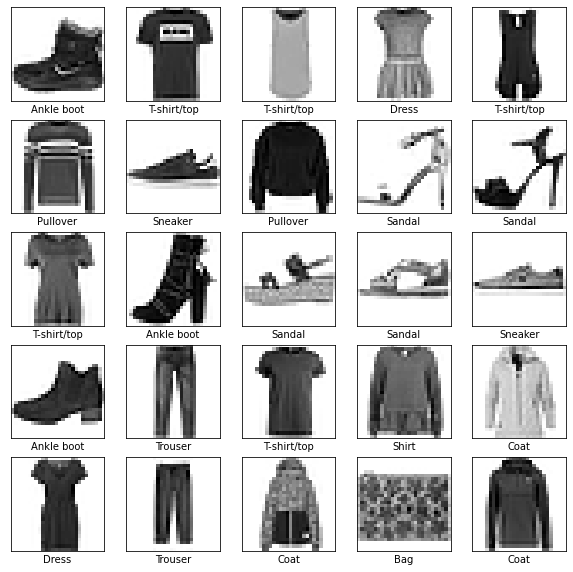

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Preprocessing the dataset

The greyscale assigned to each pixel within an image has a value range of 0-255. We will want to flatten (smoosh… scale…) this range to 0-1. To achieve this flattening, we will exploit the data structure that our images are stored in, arrays. You see, each image is stored as a 2-dimensional array where each numerical value in the array is the greyscale code of particular pixel. Conveniently, if we divide an entire array by a scalar we generate a new array whose elements are the original elements divided by the scalar.

In [6]:
train_images = train_images /255.
test_images = test_images / 255

## Model Generation

Every NN is constructed from a series of connected layers that are full of connection nodes. Simple mathematical operations are undertaken at each node in each layer, yet through the volume of connections and operations, these ML models can perform impressive and complex tasks.

Our model will be constructed from 3 layers. The first layer – often referred to as the Input Layer – will intake an image and format the data structure in a method acceptable for the subsequent layers. In our case, this first layer will be a Flatten layer that intakes a multi-dimensional array and produces an array of a single dimension, this places all the pixel data on an equal depth during input. Both of the next layers will be simple fully connected layers, referred to as Dense layers, with 128 and 10 nodes respectively. These fully connected layers are the simplest layer in the sense of understanding, yet allow for the greatest number of layer-to-layer connections and relationships.

The final bit of hyper-technical knowledge you'll need to learn is that each layer can have its own particular mathematical operation. These activation functions determine the form and relationship between the information provided by the layer. The first dense layer will feature a Rectified Linear Unit (ReLU) Activation Function that outputs values between zero and 1; mathematically, the activation function behaves like f(x)=max(0,x). The final layer uses the softmax activation function. This function also produces values in the 0-1 range, BUT generates these values such that the sum of the outputs will be 1! This makes the softmax a layer that is excellent at outputting probabilities.

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Running the code below creates a file `model_plot.png` with a plot of the created model.

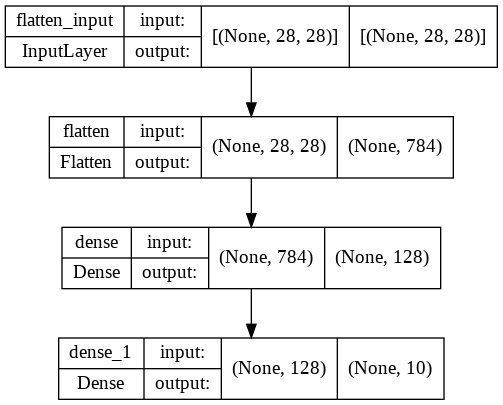

In [8]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

Let's visualise how the neural network feed fordward would look:

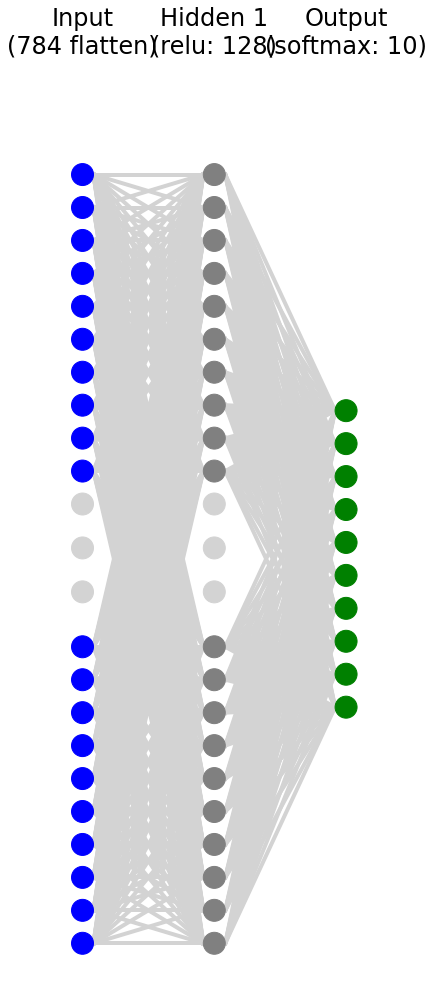

(<Figure size 8640x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbcdbb669d0>)

In [13]:
from nnv import NNV
plt.rcParams["figure.figsize"] = 120,16

layersList = [
    {"title":"Input\n(784 flatten)", "units": 784, "color": "Blue"},
    {"title":"Hidden 1\n(relu: 128)", "units": 128},
    {"title":"Output\n(softmax: 10)", "units": 10,"color": "Green"},
]
NNV(layersList, spacing_layer=10, max_num_nodes_visible=20, node_radius=1, font_size=24).render()

## Training the Model

Models must be both compiled and trained prior to use. When compiling we must define a few more parameters that control how models are updated during training (optimizer), how the model's accuracy is measured during training (loss function), and what is to be measured to determine the model's accuracy (metrics). These values were selected for this project, yet are generally dependent on the model's intent and expected input and output.

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Now we can begin training our model! Now, with already having generated and compiled the model, the code required to train the model is a single line.

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4993 - accuracy: 0.8251
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3727 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3354 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3101 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2929 - accuracy: 0.8917


This single line completes the entire job of training our model, but let's take a brief look at the arguments provided to the `model.fit` command.

- The first argument is input data, and recall that our input Flatten layer takes a (28,28) array, conforming to the dimensionality of our images.
- Next we train the system by providing the correct classification for all the training examples.
- The final argument is the number of epochs undertaken during training; each epoch is a training cycle over all the training data. Our setting the epoch value to 5 means that the model will be trained overall 60,000 training examples 5 times. After each epoch, we get both the value of the loss function and the model's accuracy (88.97% after epoch 5) at this epoch.



## Evaluating Our Model

Now we are working with a functional and trained NN model. Following our logic from the top, we have built a NN that intakes a (28,28) array, flattens the data into a (784) array, compiled and trained 2 dense layers, and the softmax activation function of the final output layer will provide a probability that the image belongs to each of the 10 label categories.

Our model can be evaluated by using the `model.evaluate` command, that takes in the images and labels so that it can compare its predictions to the ground truth provided by the labels. `model.evaluate` provides two outputs, the value of the loss function over the testing examples, and the accuracy of the model over this testing population. The important output for us is the model's accuracy.

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Model Accuracy: {test_acc * 100}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.3499 - accuracy: 0.8734
Model Accuracy: 87.33999729156494%


This is great! Our model performs at an accuracy of 87.21%. As good as that is, it is lower than the model accuracy promised above (89.01%). This lower performance is due to the model overfitting on the training data. Overfitting occurs when there are too many parameters within the model when compared to the number of training instances; this allows the model to over learn on those limited examples. Overfitting leads to better model performance over non-training data.

That said, 87.21% is a decent number! Let's finally learn how you can feed our model the series of test examples from the `test_images` array, and have it provide its predictions.

In [17]:
predictions = model.predict(test_images)
predictions[1]

array([1.1138022e-05, 3.4752451e-10, 9.9778593e-01, 5.9357214e-11,
       9.5790683e-04, 8.6428836e-11, 1.2450196e-03, 3.8463877e-13,
       1.2427666e-08, 3.0104505e-13], dtype=float32)

As we can see, most of the entries in our prediction array are very close to 0. They are written in scientific notation--the value after the e being the number decimal places to adjust the value (for example 5.1 e-04 is actually 0.00051). The entry that stands out is `predictions[0][9]` at .8658, or 86.58%, certainty that this image should be classified as a boot!

If you prefer to not look through a list to determine the class label, we can simplify the output by:

In [18]:
np.argmax(predictions[1])

2

Finally, we can verify this prediction by looking at the label ourselves:

In [19]:
test_labels[1]

2

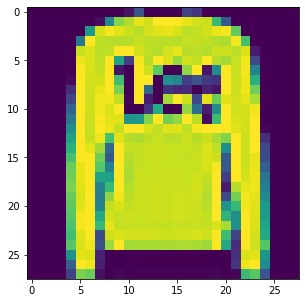

In [20]:
plt.figure(figsize=(10,5))
plt.imshow(test_images[1])
plt.colormaps()
plt.show()

There you have it! You have built and trained your first neural network from scratch, and properly classified a shirt as a shirt!


In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

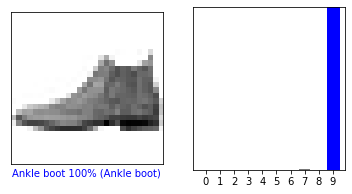

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

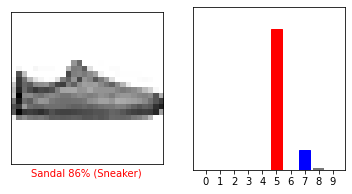

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

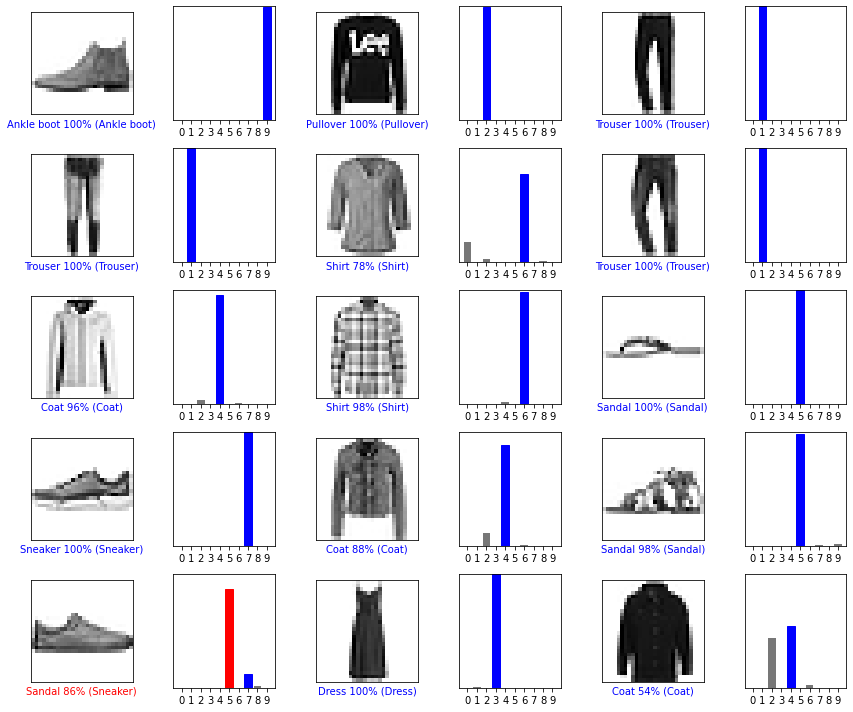

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use the trained model

In [44]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [45]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [46]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [47]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.08536535 0.08536441 0.2315313  0.08536441 0.08544622 0.08536441
  0.08547075 0.08536441 0.0853644  0.0853644 ]]


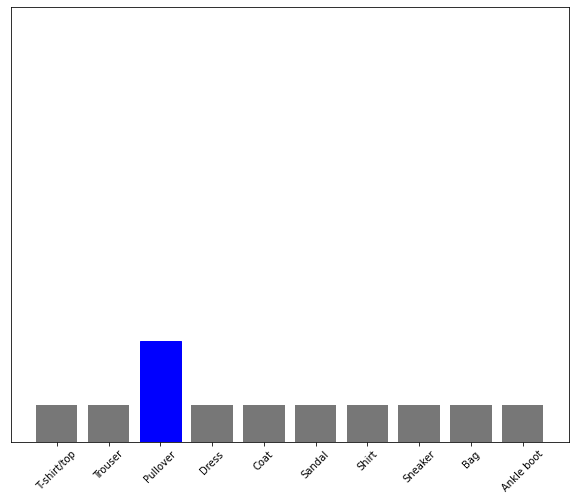

In [55]:
plt.figure(figsize=(10,8))
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [49]:
np.argmax(predictions_single[0])

2